# 예측 애널리틱스: 의사결정나무

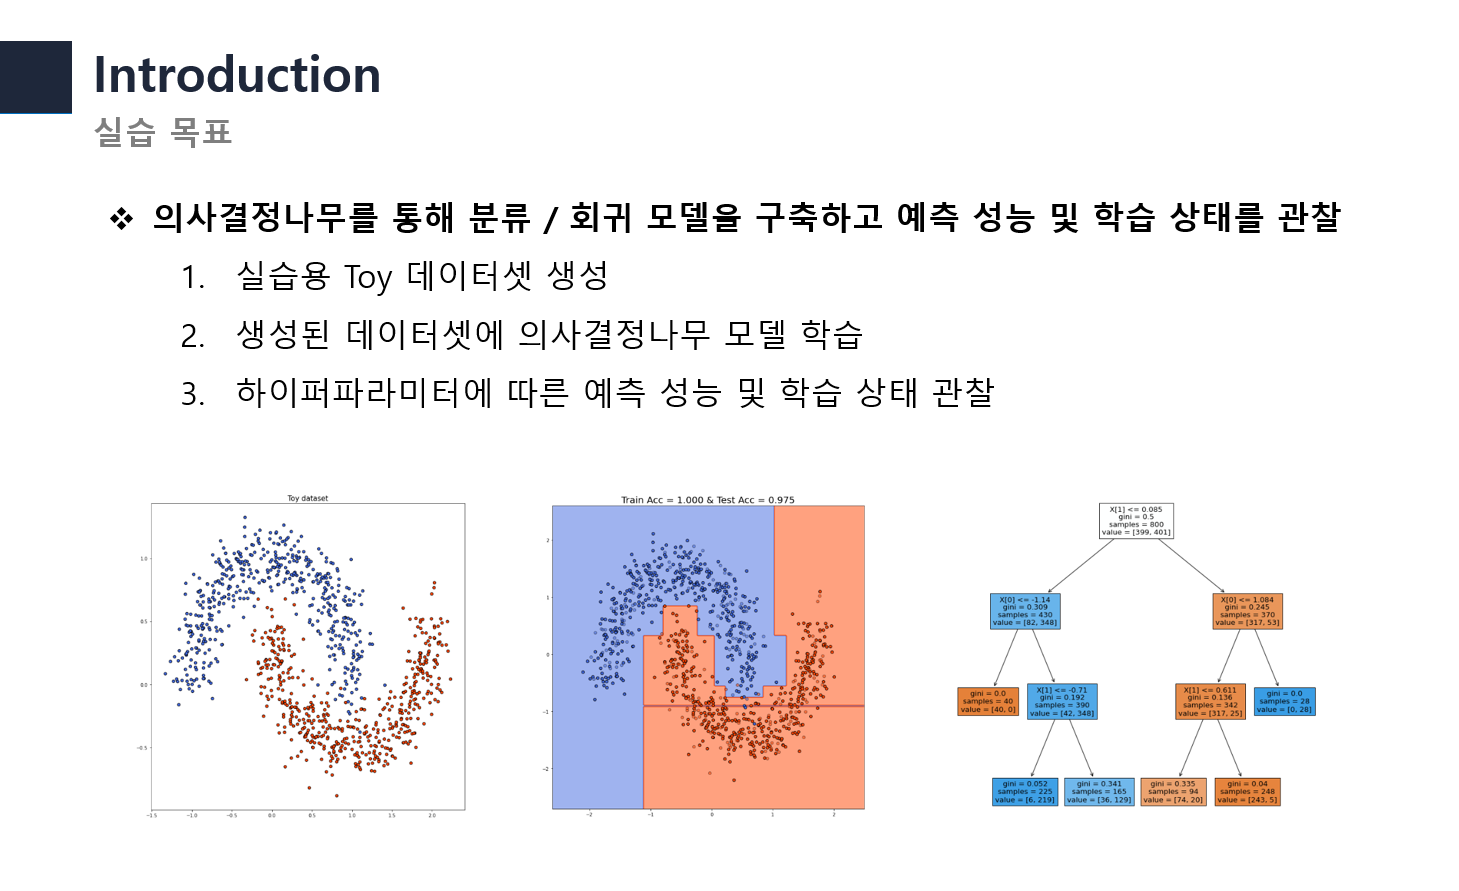

# 1. 모듈 불러오기

In [1]:
# 데이터 전처리
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.tree import plot_tree # 의사결정 나무 규칙을 시각화하기 위한 패키지

# 시각화
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 2. 분류 모델 구축하기 

## 2.1 데이터 생성

In [2]:
# Seed를 고정하여 같은 매번 같은 데이터가 만들어지도록 설정
random_state = 2020

# 데이터 개수는 1000개로 설정
n_samples = 1000

# 초승달 모양의 분류 데이터 생성
feature, target = make_moons(n_samples=n_samples, noise=0.2, random_state=random_state)

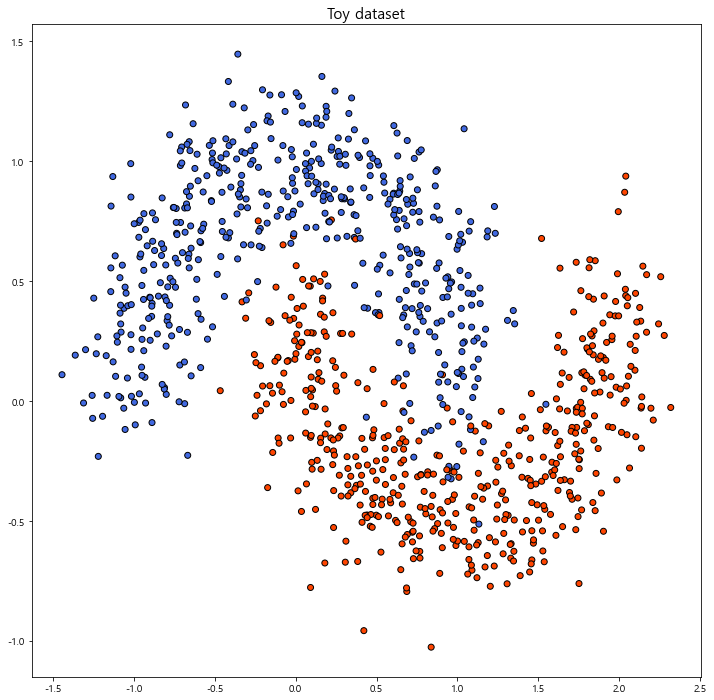

In [3]:
cmap = ListedColormap(['royalblue', 'orangered']) # Toy dataset 시각화를 위한 색 지정

fig = plt.figure(figsize=(12,12)) # figsize = 그림 크기 조절
plt.scatter(feature[:, 0], feature[:, 1], c=target, edgecolors='k', cmap=cmap)
plt.title('Toy dataset',fontsize=15)

plt.show()

## 2.2 모델 학습하기

In [4]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=random_state)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [5]:
model = DecisionTreeClassifier(max_depth=3) # 나무 최대 깊이를 제한 가능 : 하이퍼파라미터로 조절 가능
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## 2.3 예측 결과 확인 및 학습 상태 체크

In [6]:
# train, test acc
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('Training Accuracy: {:.3f}'.format(acc_train))
print('Testing Accuracy: {:.3f}'.format(acc_test))

Training Accuracy: 0.916
Testing Accuracy: 0.945


In [7]:
# 시각화를 위한 격자 생성
feature = scaler.transform(feature) # feature = np.concatenate([X_train,X_test])

x_min, x_max = feature[:, 0].min() - .5, feature[:, 0].max() + .5
y_min, y_max = feature[:, 1].min() - .5, feature[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1)]) # columnwise concat = np.hstack

In [8]:
# 격자 공간에 대한 예측 확률값
y_pred_prob = model.predict_proba(grid)[:, 1] # 2번째 category일 확률값 

# Contour
Z = y_pred_prob.reshape(xx.shape)

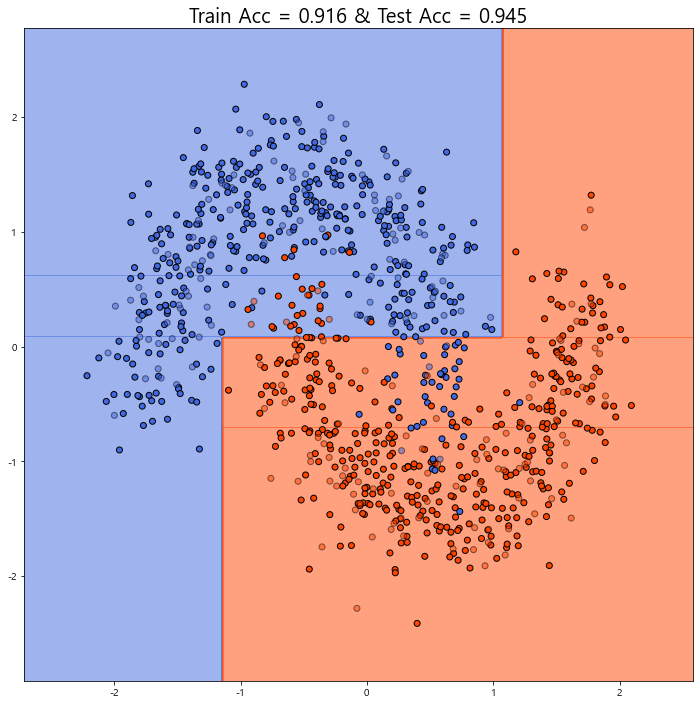

In [9]:
# 시각화: contour를 먼저 그리고, test는 약간 투명하게 표기
plt.figure(figsize=(12, 12))

plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', alpha=0.5, cmap=cmap)
plt.title('Train Acc = {:.3f} & Test Acc = {:.3f}'.format(acc_train, acc_test), fontsize=20)

plt.show()

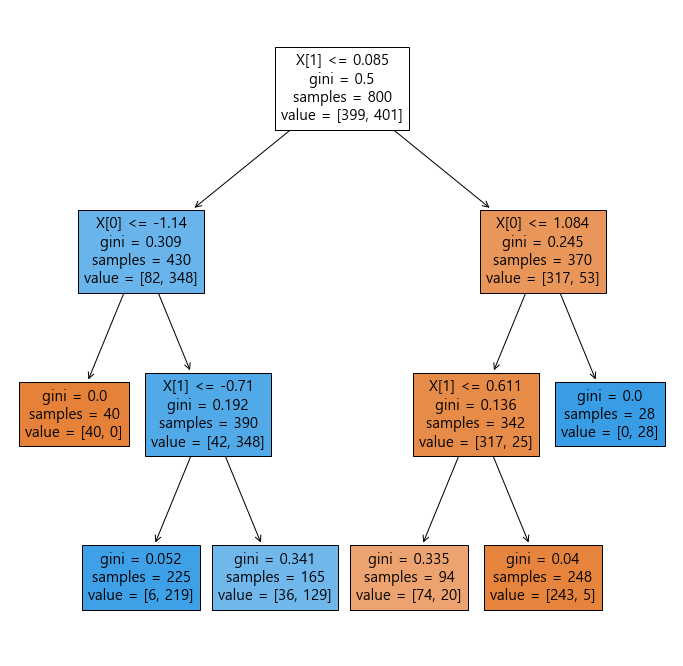

In [10]:
# 학습에 사용되었던 의사결정나무 규칙 시각화
plt.figure(figsize=(12,12))
plot_tree(decision_tree=model , filled=True) # filled : 많은 클래스가 포함되어 있는 것으로 색 표기
plt.show()

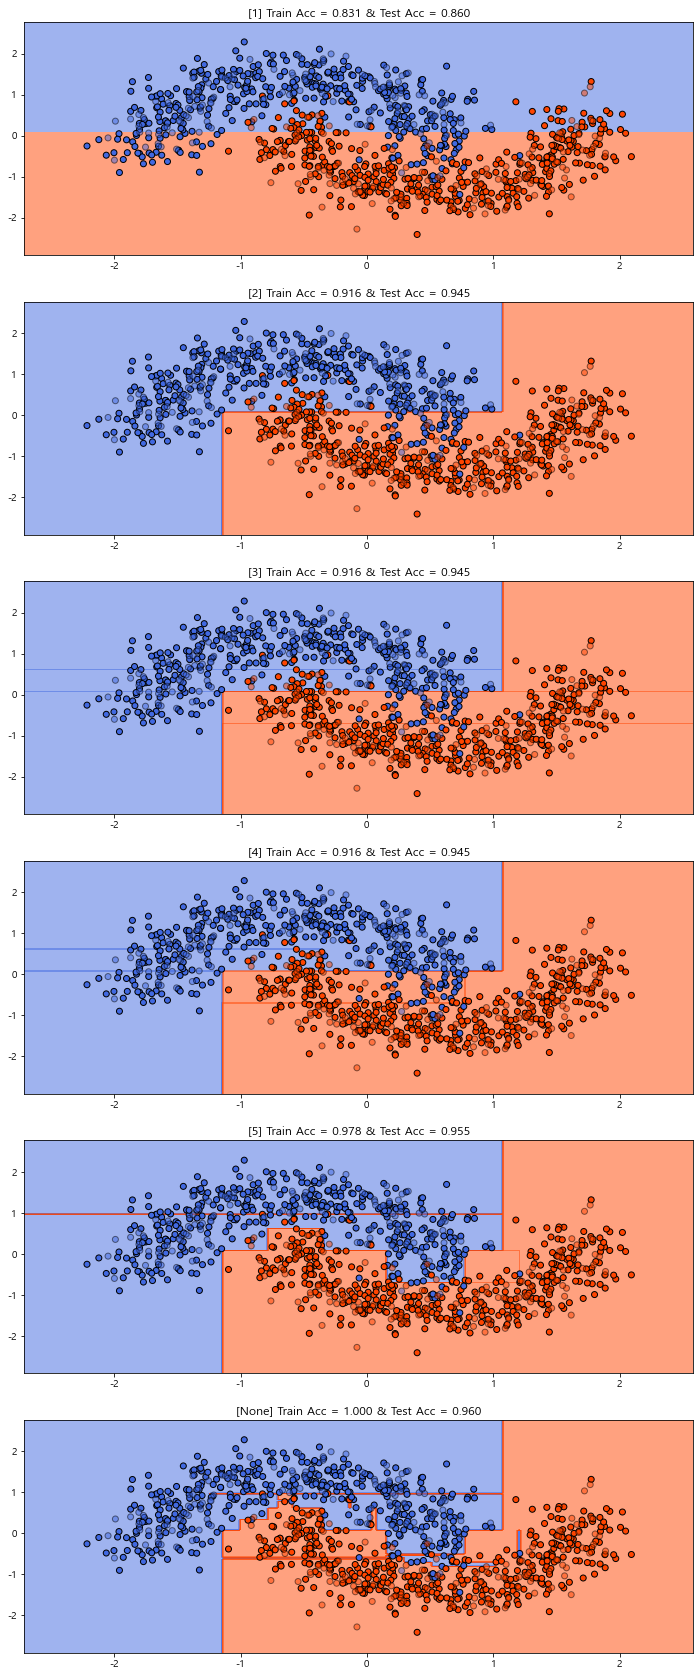

In [11]:
max_depths = [1, 2, 3, 4, 5,None]
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(12, 30))
axs = axs.ravel()

for i, max_depth in enumerate(max_depths):
    
    # 모델 학습
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # 예측
    # 1. train, test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    
    # 2. grid
    y_pred_prob = model.predict_proba(grid)[:, 1]
    Z = y_pred_prob.reshape(xx.shape)
    
    # plot
    axs[i].contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap)
    axs[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', alpha=0.5, cmap=cmap)
    axs[i].set_title('[{}] Train Acc = {:.3f} & Test Acc = {:.3f}'.format(max_depth, acc_train, acc_test))
        
plt.show()

# 3. 회귀 모델 구축하기

## 3.1 데이터 생성 

$y=sin(x)+\epsilon ~ N(0,0.5^2)$

In [12]:
random_state = 2020
n_samples = 1000

np.random.seed(random_state) # random seed 고정 

X = np.random.rand(n_samples, 1) * 10 # np.random.rand (x,y) : 행 x 개 , 열 y 개만큼의 유니폼 분포 (0,1) 난수 생성
X = np.sort(X, axis=0) # 행을 기준으로 크기 순 나열

y = np.sin(X).reshape(-1, ) + np.random.randn(n_samples) * 0.5

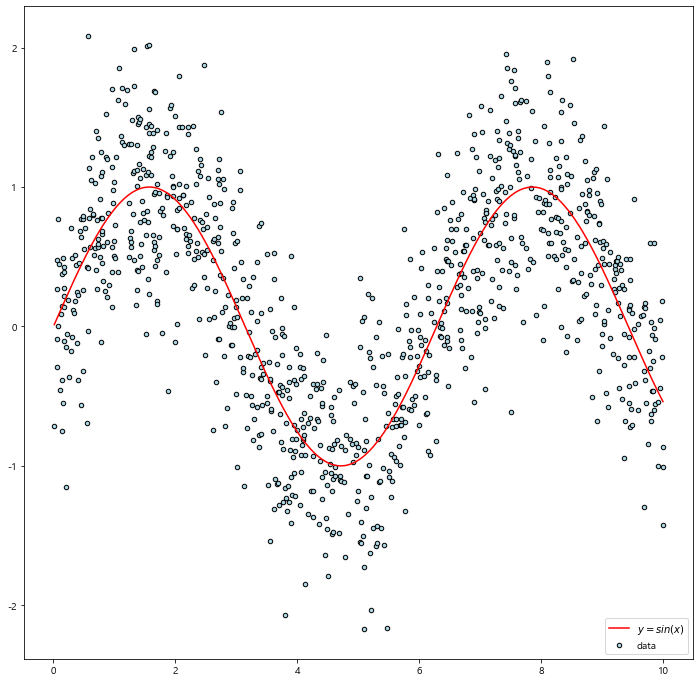

In [13]:
# 시각화
plt.figure(figsize=(12, 12))
plt.scatter(X, y, s=20, edgecolor='black', c='lightblue', label='data')
plt.plot(X,np.sin(X), c = 'red' , label ='$y=sin(x)$')
plt.legend(loc='lower right')
plt.show()

## 3.2 모델 학습하기

In [14]:
# train / test split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = .2 , random_state = random_state)

# sorting X_test ( for visualization )
sort_idx = np.argsort(X_test,axis=0).reshape(-1)
X_test , y_test = X_test[sort_idx] , y_test[sort_idx]

# 모델 학습
model = DecisionTreeRegressor(max_depth=None) # max_depth 제한 x 
model.fit(X_train, y_train)

DecisionTreeRegressor()

## 3.3 예측 결과 확인 및 학습 상태 체크

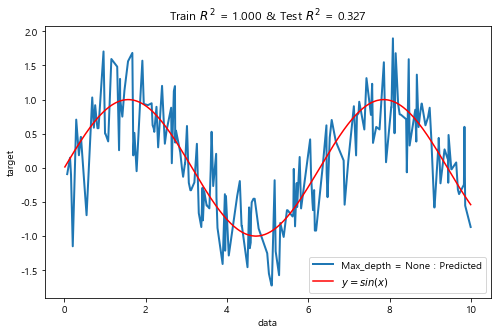

In [15]:
# test data 생성
y_test_pred = model.predict(X_test)

# 원본 데이터 및 결과 시각화
plt.figure(figsize=(8, 5))

plt.plot(X_test, y_test_pred, linewidth=2 , label = 'Max_depth = None : Predicted')
plt.plot(X,np.sin(X), c = 'red' , label ='$y=sin(x)$')

plt.xlabel('data')
plt.ylabel('target')
plt.legend(loc='lower right')
train_r2 = r2_score(y_pred=model.predict(X_train) , y_true = y_train) 
test_r2 = r2_score(y_pred= y_test_pred, y_true = y_test)
plt.title('Train $R^2$ = {:.3f} & Test $R^2$ = {:.3f}'.format(train_r2, test_r2))
plt.show()

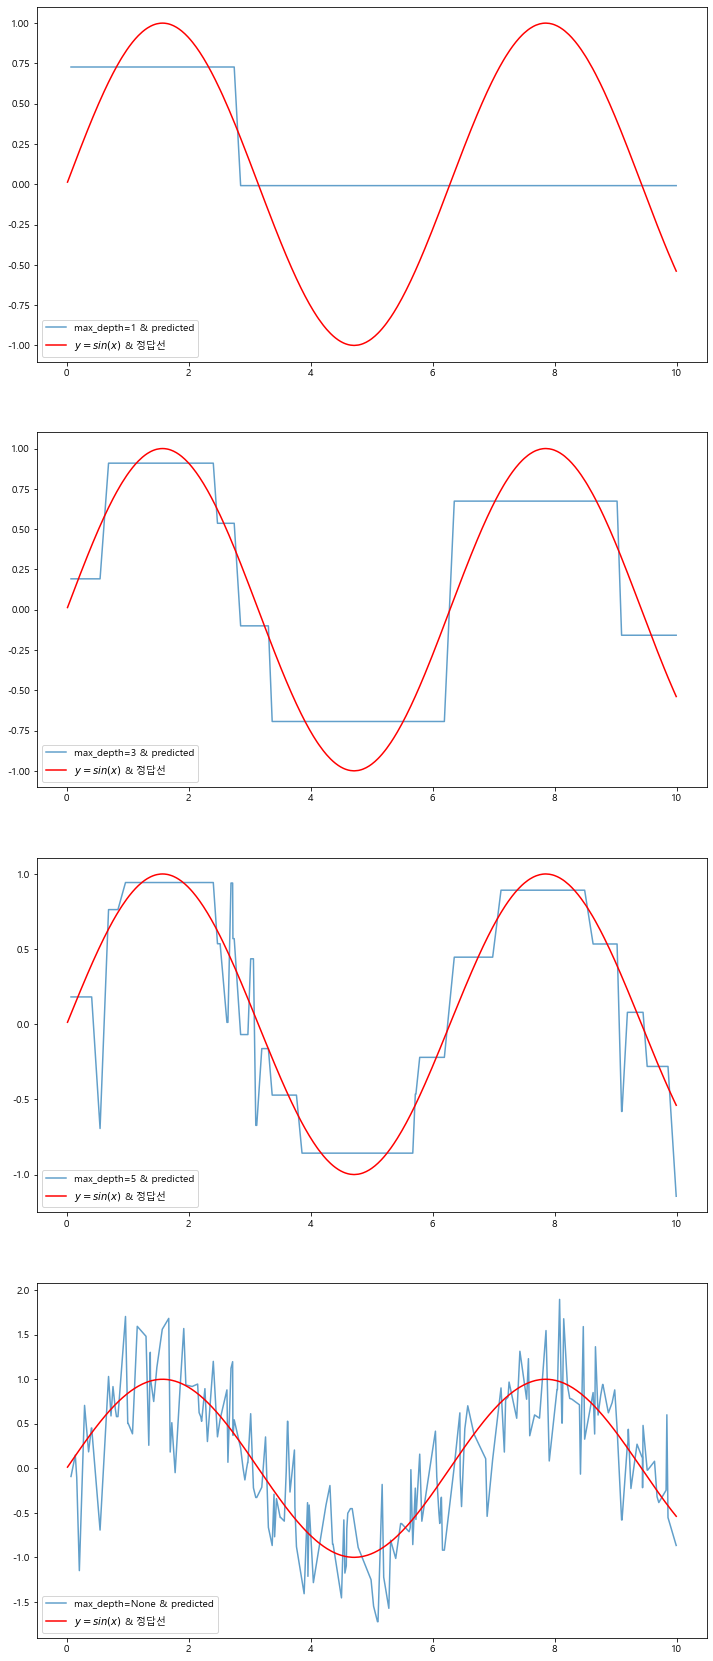

In [16]:
max_depths = [1, 3, 5, None]
train_r2 = []
test_r2 = []

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 30))
axs = axs.ravel()


for i, max_depth in enumerate(max_depths):
    
    # 모델 학습
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # 예측
    y_test_pred = model.predict(X_test)
    
    # plot
    axs[i].plot(X_test, y_test_pred, label='max_depth={} & predicted'.format(max_depth), linewidth=1.5, alpha=0.7)
    axs[i].plot(X,np.sin(X), c = 'red' , label ='$y=sin(x)$ & 정답선')

    # 예측 score 기록
    train_r2.append(r2_score(y_pred=model.predict(X_train) , y_true = y_train) )
    test_r2.append(r2_score(y_pred= y_test_pred, y_true = y_test))

    axs[i].legend()
plt.show()

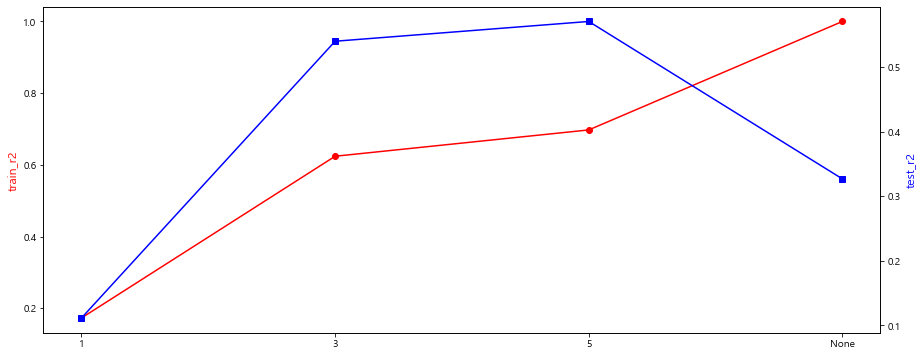

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))

xticks = list(map(str, max_depths))

ax.plot(range(len(max_depths)), train_r2, color='red', marker='o')
ax.set_ylabel('train_r2', color='red', fontsize=12)

ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), test_r2, color='blue', marker='s')
ax2.set_ylabel('test_r2', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()